# <p style="padding:20px;background-color:#ffe7a0;margin:0;color:(0,0,0);font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">Application of Machine Learning Models to predict Company Bankruptcy</p>

Dữ liệu được thu thập từ **Taiwan Economic Journal** trong các năm 1999 đến 2009. Công ty phá sản được xác định dựa trên các quy định kinh doanh của Sở giao dịch chứng khoán Đài Loan (Taiwan Stock Exchange).

**DataSet Link:** https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

Phá sản hoặc thất bại trong kinh doanh có thể có tác động tiêu cực đến cả bản thân doanh nghiệp và nền kinh tế toàn cầu. Những người hành nghề kinh doanh, nhà đầu tư, chính phủ và các nhà nghiên cứu học thuật từ lâu đã nghiên cứu các cách để xác định rủi ro thất bại trong kinh doanh nhằm giảm thiệt hại kinh tế do phá sản.

Tóm lại, dự đoán phá sản là một nhiệm vụ rất quan trọng đối với nhiều tổ chức tài chính liên quan. Nói chung, mục đích là để dự đoán khả năng một công ty có thể phá sản. Các tổ chức tài chính đang cần các mô hình dự đoán hiệu quả để đưa ra các quyết định cho vay phù hợp.

<a class="anchor" id="0.1"></a>
### Table of Contents
+ [**1. Load data**](#1)
    + [1.1 Import the libraries](#1.1)
    + [1.2 Load the dataset](#1.2)
+ [**2. Exploratory Data Analysis**](#2)
    + [2.1 Understanding dataset](#2.1)
    + [2.2 Data Cleaning](#2.2)
+ [**3. EDA and Visualization**](#3)
    + [3.1 Feature Selection](#3.1)
    + [3.2 Data Visualization](#3.2)
    + [3.3 Imbalanced Data](#3.3)
    + [3.4 Splitting and training](#3.4)
+ [**4. Model building**](#4)
    + [4.1 Logisitc Regression](#4.1)
    + [4.2 Naive Bayes](#4.2)
    + [4.3 KNN](#4.3)
    + [4.4 Decision Tree](#4.4)
    + [4.5 Random Forest](#4.5)
    + [4.6 SVM](#4.6)
    + [4.7 XG Boost](#4.7)
    + [4.8 CatBoost](#4.8)
    + [4.9 ANN](#4.9)
+ [**5. Result**](#5)

+ [**6. Conclusions**](#6)


<a class="anchor" id="1"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">1. LOAD DATA</p>
[**Table of Contents**](#0.1)

### 1.1 Import the libraries <a class="anchor" id="1.1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load the dataset <a class="anchor" id="1.2"></a>

In [2]:
data = pd.read_csv("data.csv")
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
data.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


<a class="anchor" id="2"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">2. EXPLORATORY DATA ANALYSIS</p>
[**Table of Contents**](#0.1)

## 2.1 Understanding dataset <a class="anchor" id="2.1"></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**Nhận xét:** 
+ Kết quả trên cho ta biết về thông tin cơ bản của các thành phần trong dataset. 
+ Ngoài ra, tên cột target thừa kí hiệu `?`, do đó cần loại bỏ kí hiệu này cho tên cột phù hợp.

In [6]:
data.rename(columns = {'Bankrupt?':'Bankrupt'}, inplace = True)
data.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


**Nhận xét:** Như vậy, tên target đã được đổi lại cho phù hợp.

In [7]:
data.shape

(6819, 96)

**Nhận xét:** Dataset có **6819** dòng và **96** cột (bao gồm cả cột target là Bankrupt?)

In [8]:
data.isnull().sum()

Bankrupt                                                    0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

**Nhận xét:** Không có cột nào có chứa giá trị null.

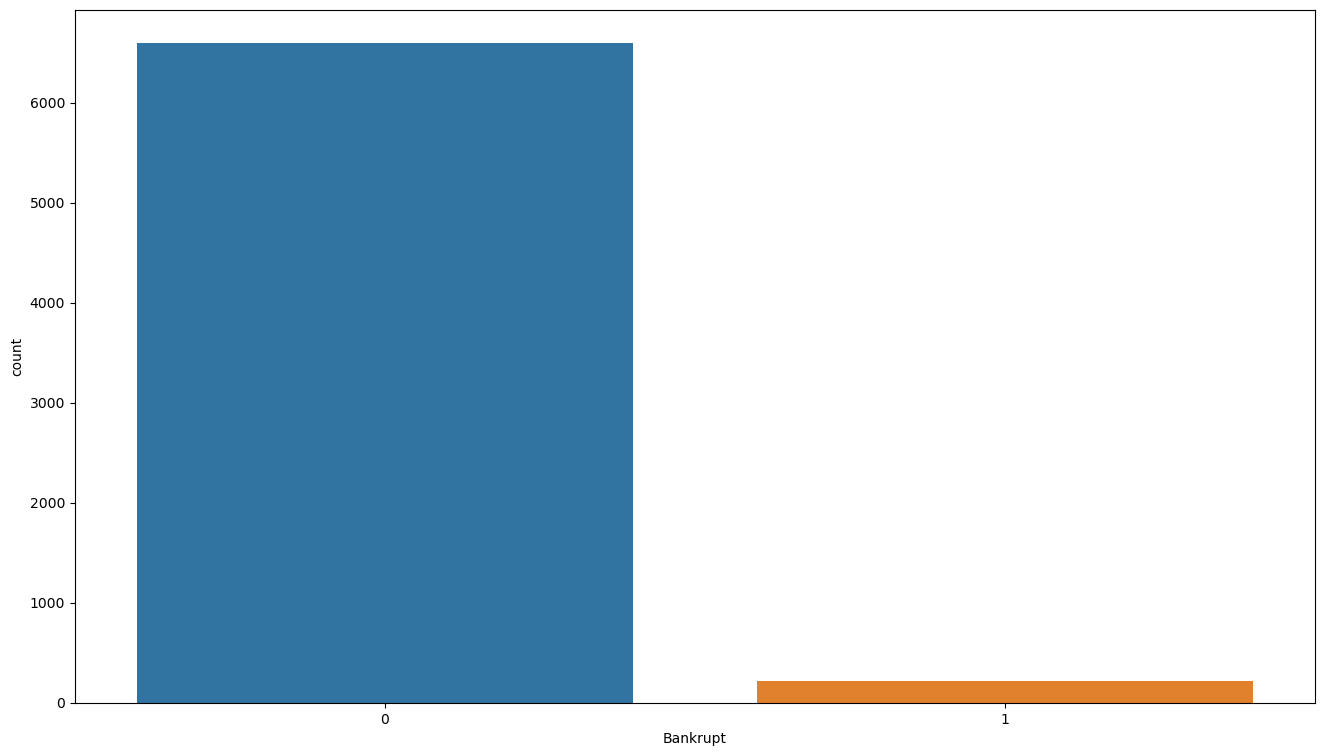

0    6599
1     220
Name: Bankrupt, dtype: int64


In [9]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt', data = data)
plt.show()
print(data['Bankrupt'].value_counts())

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


**Nhận xét tổng quan về dataset:**
+ Dataset gồm có 6819 dòng và 96 cột.
+ Không có giá trị null trong dữ liệu.
+ Bankrupt: không phá sản (0 = 6599) và phá sản (1 = 220).
+ Data Bankrupt là dạng **Imbalanced**.

## 2.2 Data Cleaning <a class="anchor" id="2.2"></a>

In [11]:
# Check if there are any duplicate rows
# data.duplicated(keep=False).sum()

In [12]:
# Xử lý dữ liệu ngoại lệ


In [13]:
# Xem dữ liệu bị thiếu
# data.isnull().values.sum() # check missing values

<a class="anchor" id="3"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">3. EDA AND VISUALIZATION</p>

[**Table of Contents**](#0.1)

## 3.1 Feature Selection <a class="anchor" id="3.1"></a>

In [14]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

In [15]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

### Determine Mutual Information

In [16]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([2.94572672e-02, 3.37615217e-02, 3.04539827e-02, 1.65464773e-02,
       1.70998763e-02, 2.04744983e-02, 3.01792341e-02, 2.74589948e-02,
       3.21051334e-02, 3.63208515e-02, 0.00000000e+00, 0.00000000e+00,
       1.34079656e-02, 0.00000000e+00, 1.69658598e-02, 3.17772206e-02,
       2.92461952e-02, 2.78732463e-02, 4.31119423e-02, 6.62825522e-03,
       1.88326180e-03, 2.22219635e-02, 4.18934491e-02, 8.80892085e-03,
       6.74144600e-03, 1.21267252e-02, 9.74669492e-03, 1.12578744e-02,
       1.45242607e-02, 3.93099308e-03, 1.25341965e-02, 5.22248535e-04,
       2.18299077e-02, 2.36500836e-02, 3.43223921e-02, 3.04627823e-02,
       3.55321143e-02, 3.49441368e-02, 1.04768216e-02, 3.95366176e-02,
       4.21277184e-03, 2.49464463e-02, 4.30660451e-02, 5.63412101e-03,
       1.23800358e-02, 7.58779225e-05, 2.86241113e-03, 1.79741590e-03,
       6.72686552e-03, 0.00000000e+00, 0.00000000e+00, 2.45788593e-02,
       5.87799437e-03, 2.65019169e-02, 5.76041803e-03, 7.12647241e-04,
      

### Feature Importance

Text(0, 0.5, 'Mutual Information')

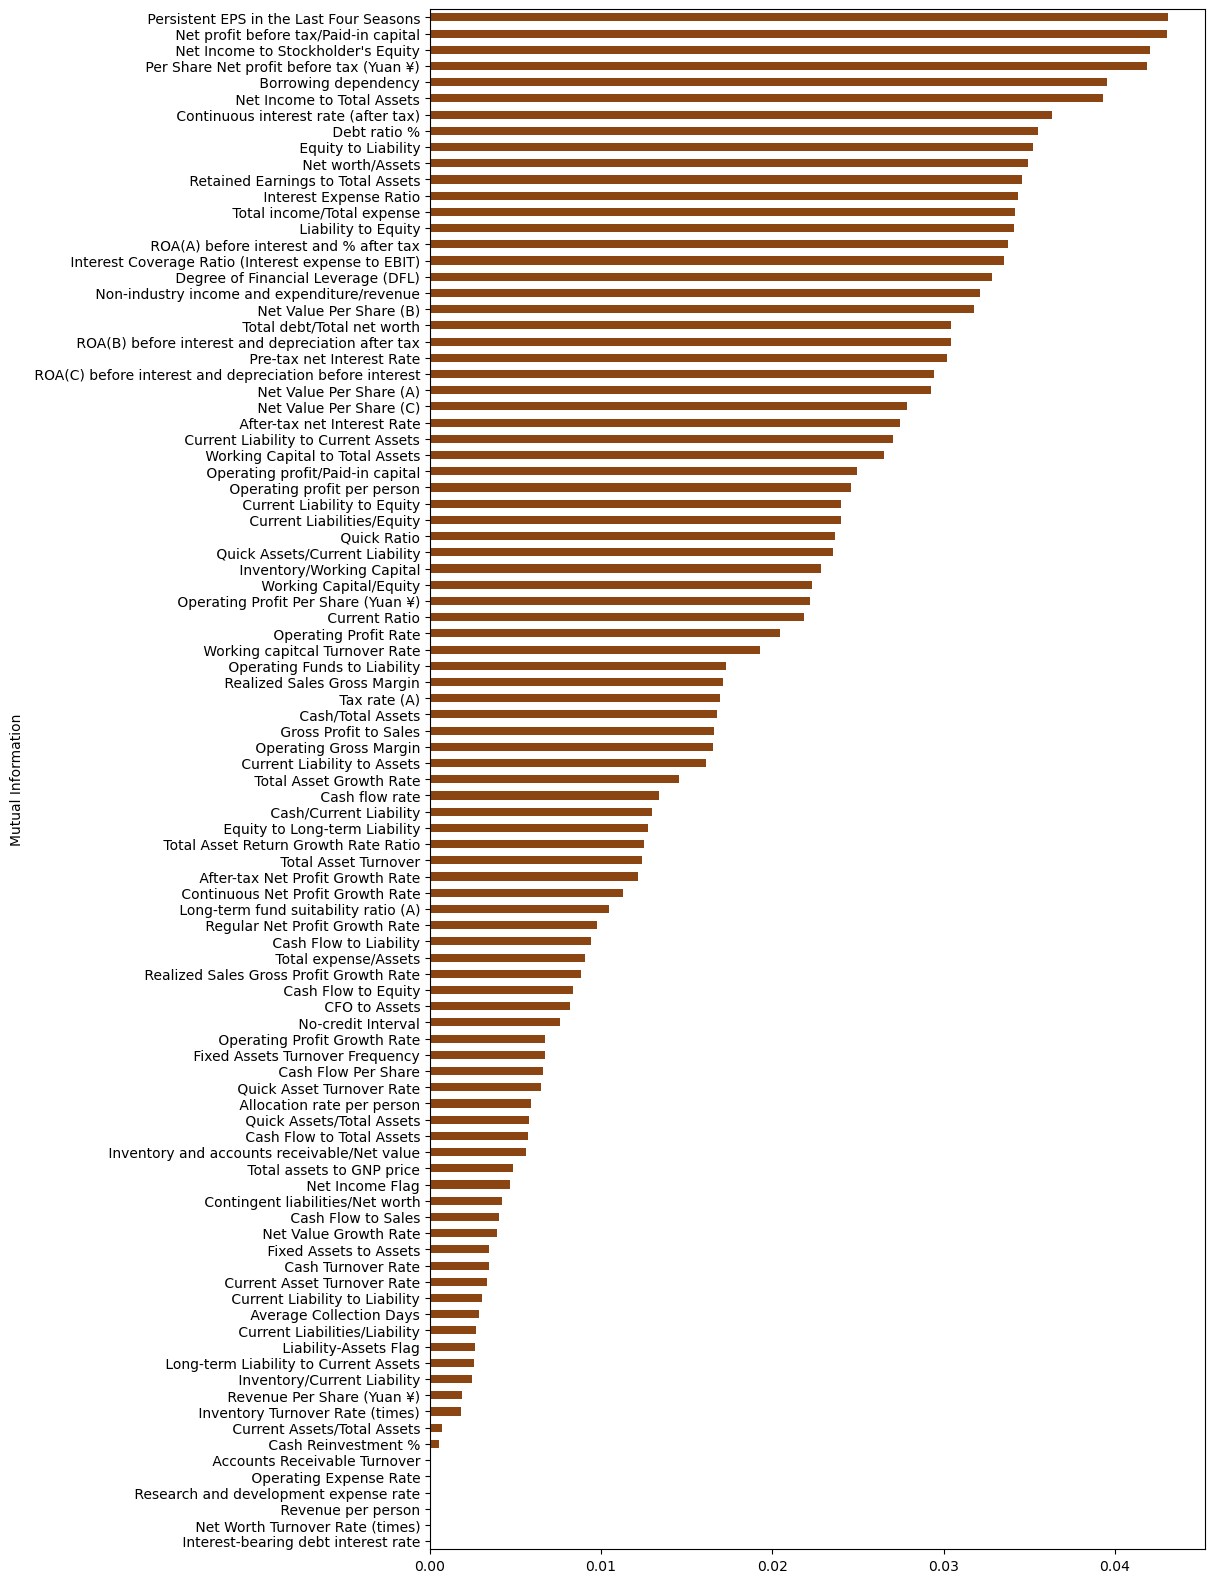

In [17]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=True).plot.barh(figsize=(10, 20), color = '#8B4513')
plt.ylabel('Mutual Information')

**Nhận xét:**
+ Thứ tự các feature có ảnh hưởng đến **Bankrupt** được sort từ cao đến thấp.
+ 10 features có tác động lớn gồm:
    + Continuous interest rate (after tax),
    + Persistent EPS in the Last Four Seasons
    + Per Share Net profit before tax (Yuan ¥)
    + Debt ratio %
    + Net worth/Assets
    + Borrowing dependency
    + Net profit before tax/Paid-in capital
    + Net Income to Total Assets
    + Net Income to Stockholder's Equity
    + Equity to Liability
    + ...

### Select top k features based on MI

In [18]:
# here we will select the top 10 features
# based on their mutual information value

# select features
top_features = SelectKBest(mutual_info_classif, k=10) # k = 10
sel_ = top_features.fit(X_train, y_train) 

# display features
X_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Interest Expense Ratio',
       ' Debt ratio %', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.2 Data Visualization <a class="anchor" id="3.2"></a>

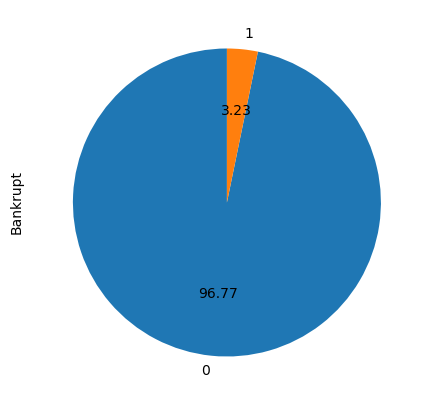

In [20]:
plt.figure(figsize=(5, 5))
data['Bankrupt'].value_counts().plot(kind='pie', autopct="%.2f", startangle = 90)
plt.show();

## 3.3 Imbalanced Data <a class="anchor" id="3.3"></a>

In [21]:
# Using SMOTE method to over sample the data
x, y = data.drop('Bankrupt',axis=1),data['Bankrupt']
x.shape, y.shape

((6819, 95), (6819,))

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)

In [23]:
x.shape,y.shape

((13198, 95), (13198,))

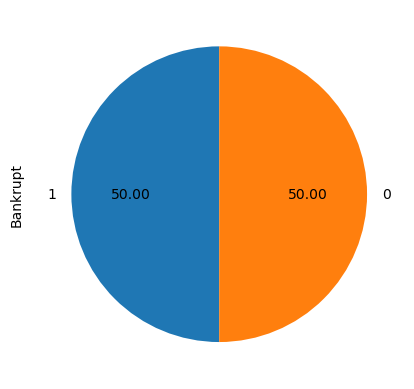

In [24]:
y.value_counts().plot(kind='pie',autopct="%.2f", startangle = 90)
plt.show()

**Nhận xét:** sau khi điều chỉnh, dữ liệu trở thành dạng Balance.

### 3.4 Splitting and training <a class="anchor" id="3.4"></a>

In [25]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

In [26]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [27]:
X_train.shape, X_test.shape

((4773, 10), (2046, 10))

<a class="anchor" id="4"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">4. MODEL BUILDING</p>

[**Table of Contents**](#0.1)

## 4.1 Logistic Regression <a class="anchor" id="4.1"></a>

In [28]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred = LR_model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [30]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.9721407624633431


## 4.2 Naive Bayes <a class="anchor" id="4.2"></a>

### Training the Naive Bayes on the Training set

In [31]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [32]:
from sklearn.metrics import confusion_matrix

y_pred = NB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1937   50]
 [  32   27]]


In [33]:
acc2 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc2}")

Accuracy score : 0.9599217986314761


## 4.3 KNN <a class="anchor" id="4.3"></a>

### Training the K-NN model on the Training set

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = KNN_model.predict(X_test)

### KNN confusion matrix

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1963   24]
 [  47   12]]


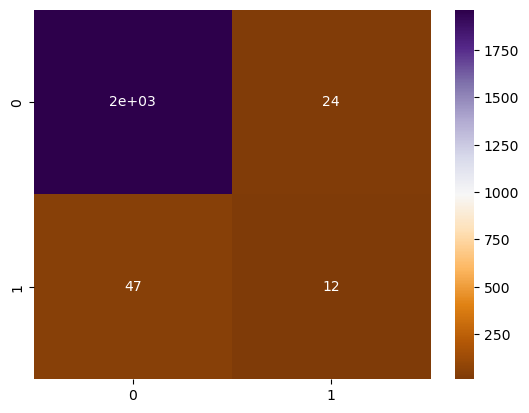

In [37]:
sns.heatmap(cm, annot=True, cmap='PuOr',)
plt.show()

In [38]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.9652981427174976


## 4.4 Decision Tree <a class="anchor" id="4.4"></a>

### Training Decision Tree Classification on Train set

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred = DTR_model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc4}")

Accuracy score: 0.9535679374389052


## 4.5 Random Forest <a class="anchor" id="4.5"></a>

### Training the Random Forest Classification model on the Training set

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [42]:
y_pred = RF_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc5 = accuracy_score(y_test, y_pred)

[[1975   12]
 [  49   10]]


In [43]:
print(f"Random Forest Classification accuracy: {acc5}")

Random Forest Classification accuracy: 0.9701857282502444


## 4.6 SVM <a class="anchor" id="4.6"></a>

In [44]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

### Predict the test set result of SVM

In [45]:
y_pred = SVM_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1987    0]
 [  59    0]]


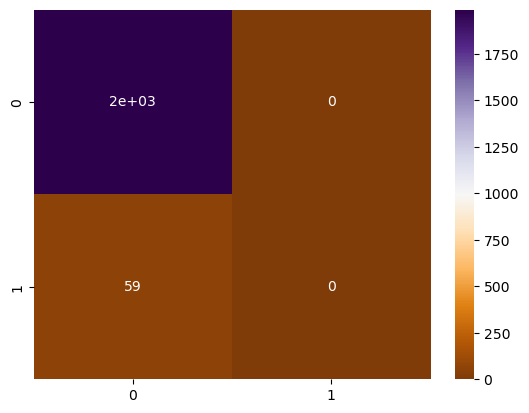

In [46]:
sns.heatmap(cm, annot=True, cmap='PuOr',)
plt.show()

In [47]:
acc6 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc6}")

Accuracy score: 0.9711632453567938


## 4.7 XGBoost <a class="anchor" id="4.7"></a>

In [48]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

### XG Boost Classifier confusion matrix

In [49]:
y_pred = XGB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[1972   15]
 [  47   12]]


In [50]:
print("XG Boost classifier Acc: %0.4f" % acc7)

XG Boost classifier Acc: 0.9697


## 4.8 CatBoost <a class="anchor" id="4.8"></a>

### Training CatBoost on the Training set

In [51]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

Learning rate set to 0.020081
0:	learn: 0.6500015	total: 61.1ms	remaining: 1m 1s
1:	learn: 0.6048000	total: 62.7ms	remaining: 31.3s
2:	learn: 0.5616022	total: 64.3ms	remaining: 21.4s
3:	learn: 0.5238547	total: 71.3ms	remaining: 17.8s
4:	learn: 0.4899345	total: 72.9ms	remaining: 14.5s
5:	learn: 0.4597416	total: 75.1ms	remaining: 12.4s
6:	learn: 0.4314111	total: 76.8ms	remaining: 10.9s
7:	learn: 0.4059872	total: 82.6ms	remaining: 10.2s
8:	learn: 0.3822716	total: 84.7ms	remaining: 9.33s
9:	learn: 0.3615291	total: 86.6ms	remaining: 8.58s
10:	learn: 0.3424555	total: 88.3ms	remaining: 7.94s
11:	learn: 0.3242489	total: 90.4ms	remaining: 7.44s
12:	learn: 0.3068522	total: 98.7ms	remaining: 7.49s
13:	learn: 0.2910154	total: 101ms	remaining: 7.12s
14:	learn: 0.2759490	total: 103ms	remaining: 6.79s
15:	learn: 0.2629730	total: 105ms	remaining: 6.48s
16:	learn: 0.2514992	total: 107ms	remaining: 6.21s
17:	learn: 0.2392272	total: 110ms	remaining: 5.97s
18:	learn: 0.2296773	total: 111ms	remaining: 5.75

193:	learn: 0.0677801	total: 516ms	remaining: 2.14s
194:	learn: 0.0677028	total: 520ms	remaining: 2.15s
195:	learn: 0.0676373	total: 522ms	remaining: 2.14s
196:	learn: 0.0675315	total: 524ms	remaining: 2.14s
197:	learn: 0.0674450	total: 526ms	remaining: 2.13s
198:	learn: 0.0673836	total: 529ms	remaining: 2.13s
199:	learn: 0.0672957	total: 531ms	remaining: 2.12s
200:	learn: 0.0672456	total: 533ms	remaining: 2.12s
201:	learn: 0.0671782	total: 534ms	remaining: 2.11s
202:	learn: 0.0670430	total: 536ms	remaining: 2.1s
203:	learn: 0.0669717	total: 538ms	remaining: 2.1s
204:	learn: 0.0668477	total: 539ms	remaining: 2.09s
205:	learn: 0.0667592	total: 541ms	remaining: 2.08s
206:	learn: 0.0666521	total: 543ms	remaining: 2.08s
207:	learn: 0.0665243	total: 546ms	remaining: 2.08s
208:	learn: 0.0664357	total: 548ms	remaining: 2.07s
209:	learn: 0.0663222	total: 550ms	remaining: 2.07s
210:	learn: 0.0662004	total: 551ms	remaining: 2.06s
211:	learn: 0.0661000	total: 554ms	remaining: 2.06s
212:	learn: 0.

380:	learn: 0.0538990	total: 918ms	remaining: 1.49s
381:	learn: 0.0538551	total: 920ms	remaining: 1.49s
382:	learn: 0.0538033	total: 922ms	remaining: 1.49s
383:	learn: 0.0537402	total: 924ms	remaining: 1.48s
384:	learn: 0.0536975	total: 926ms	remaining: 1.48s
385:	learn: 0.0536776	total: 928ms	remaining: 1.48s
386:	learn: 0.0536521	total: 930ms	remaining: 1.47s
387:	learn: 0.0535810	total: 933ms	remaining: 1.47s
388:	learn: 0.0535258	total: 934ms	remaining: 1.47s
389:	learn: 0.0535051	total: 936ms	remaining: 1.46s
390:	learn: 0.0534004	total: 939ms	remaining: 1.46s
391:	learn: 0.0533337	total: 941ms	remaining: 1.46s
392:	learn: 0.0532783	total: 943ms	remaining: 1.46s
393:	learn: 0.0532374	total: 945ms	remaining: 1.45s
394:	learn: 0.0531712	total: 947ms	remaining: 1.45s
395:	learn: 0.0531075	total: 949ms	remaining: 1.45s
396:	learn: 0.0530410	total: 951ms	remaining: 1.44s
397:	learn: 0.0529554	total: 953ms	remaining: 1.44s
398:	learn: 0.0529168	total: 955ms	remaining: 1.44s
399:	learn: 

562:	learn: 0.0441999	total: 1.31s	remaining: 1.02s
563:	learn: 0.0441598	total: 1.31s	remaining: 1.02s
564:	learn: 0.0441209	total: 1.32s	remaining: 1.01s
565:	learn: 0.0440838	total: 1.32s	remaining: 1.01s
566:	learn: 0.0440069	total: 1.32s	remaining: 1.01s
567:	learn: 0.0439609	total: 1.32s	remaining: 1.01s
568:	learn: 0.0439328	total: 1.32s	remaining: 1s
569:	learn: 0.0438815	total: 1.33s	remaining: 1s
570:	learn: 0.0438371	total: 1.33s	remaining: 999ms
571:	learn: 0.0437764	total: 1.33s	remaining: 997ms
572:	learn: 0.0437069	total: 1.33s	remaining: 994ms
573:	learn: 0.0436538	total: 1.34s	remaining: 992ms
574:	learn: 0.0436002	total: 1.34s	remaining: 989ms
575:	learn: 0.0435504	total: 1.34s	remaining: 987ms
576:	learn: 0.0435232	total: 1.34s	remaining: 984ms
577:	learn: 0.0434751	total: 1.34s	remaining: 981ms
578:	learn: 0.0434419	total: 1.34s	remaining: 979ms
579:	learn: 0.0433940	total: 1.35s	remaining: 976ms
580:	learn: 0.0433594	total: 1.35s	remaining: 974ms
581:	learn: 0.0432

747:	learn: 0.0363053	total: 1.72s	remaining: 581ms
748:	learn: 0.0362531	total: 1.73s	remaining: 578ms
749:	learn: 0.0361914	total: 1.73s	remaining: 576ms
750:	learn: 0.0361309	total: 1.73s	remaining: 573ms
751:	learn: 0.0360804	total: 1.73s	remaining: 571ms
752:	learn: 0.0360616	total: 1.73s	remaining: 568ms
753:	learn: 0.0360408	total: 1.73s	remaining: 566ms
754:	learn: 0.0360094	total: 1.74s	remaining: 564ms
755:	learn: 0.0359644	total: 1.74s	remaining: 561ms
756:	learn: 0.0359173	total: 1.74s	remaining: 559ms
757:	learn: 0.0358814	total: 1.74s	remaining: 557ms
758:	learn: 0.0358630	total: 1.75s	remaining: 554ms
759:	learn: 0.0358297	total: 1.75s	remaining: 552ms
760:	learn: 0.0357966	total: 1.75s	remaining: 549ms
761:	learn: 0.0357784	total: 1.75s	remaining: 547ms
762:	learn: 0.0357203	total: 1.75s	remaining: 544ms
763:	learn: 0.0356748	total: 1.75s	remaining: 542ms
764:	learn: 0.0356569	total: 1.76s	remaining: 540ms
765:	learn: 0.0356158	total: 1.76s	remaining: 537ms
766:	learn: 

941:	learn: 0.0295686	total: 2.12s	remaining: 130ms
942:	learn: 0.0295505	total: 2.12s	remaining: 128ms
943:	learn: 0.0295264	total: 2.13s	remaining: 126ms
944:	learn: 0.0295090	total: 2.13s	remaining: 124ms
945:	learn: 0.0294961	total: 2.13s	remaining: 122ms
946:	learn: 0.0294824	total: 2.13s	remaining: 119ms
947:	learn: 0.0294567	total: 2.14s	remaining: 117ms
948:	learn: 0.0294448	total: 2.14s	remaining: 115ms
949:	learn: 0.0294324	total: 2.14s	remaining: 113ms
950:	learn: 0.0293988	total: 2.14s	remaining: 110ms
951:	learn: 0.0293701	total: 2.14s	remaining: 108ms
952:	learn: 0.0293507	total: 2.15s	remaining: 106ms
953:	learn: 0.0293032	total: 2.15s	remaining: 104ms
954:	learn: 0.0292848	total: 2.15s	remaining: 101ms
955:	learn: 0.0292615	total: 2.15s	remaining: 99ms
956:	learn: 0.0292374	total: 2.15s	remaining: 96.8ms
957:	learn: 0.0292259	total: 2.15s	remaining: 94.5ms
958:	learn: 0.0292162	total: 2.16s	remaining: 92.2ms
959:	learn: 0.0291841	total: 2.16s	remaining: 90ms
960:	learn:

In [52]:
y_pred = catboost_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc8 = accuracy_score(y_test, y_pred)

[[1967   20]
 [  48   11]]


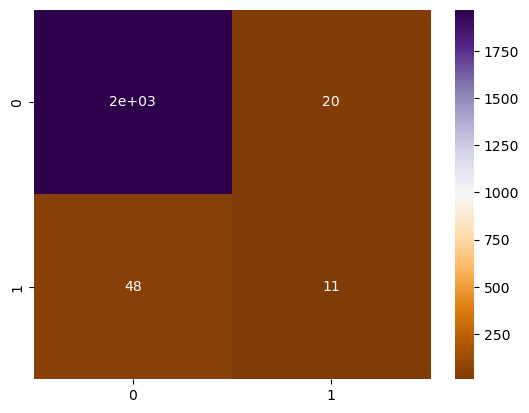

In [53]:
sns.heatmap(cm, annot=True, cmap='PuOr',)
plt.show()

In [54]:
print(acc8)

0.9667644183773216


## 4.9 ANN <a class="anchor" id="4.9"></a>

In [55]:
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

2023-01-29 01:55:02.331990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
ANN_model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

ANN_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

2023-01-29 01:55:05.154403: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
ANN_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
150/150 [==============================] - 0s 671us/step - loss: 0.6780 - accuracy: 0.5762
Epoch 2/200
150/150 [==============================] - 0s 658us/step - loss: 0.2682 - accuracy: 0.9663
Epoch 3/200
150/150 [==============================] - 0s 604us/step - loss: 0.1744 - accuracy: 0.9663
Epoch 4/200
150/150 [==============================] - 0s 623us/step - loss: 0.1508 - accuracy: 0.9663
Epoch 5/200
150/150 [==============================] - 0s 609us/step - loss: 0.1438 - accuracy: 0.9663
Epoch 6/200
150/150 [==============================] - 0s 617us/step - loss: 0.1410 - accuracy: 0.9663
Epoch 7/200
150/150 [==============================] - 0s 605us/step - loss: 0.1388 - accuracy: 0.9663
Epoch 8/200
150/150 [==============================] - 0s 626us/step - loss: 0.1368 - accuracy: 0.9663
Epoch 9/200
150/150 [==============================] - 0s 623us/step - loss: 0.1348 - accuracy: 0.9663
Epoch 10/200
150/150 [==============================] - 0s 607us/step - l

150/150 [==============================] - 0s 592us/step - loss: 0.1008 - accuracy: 0.9658
Epoch 158/200
150/150 [==============================] - 0s 605us/step - loss: 0.1004 - accuracy: 0.9661
Epoch 159/200
150/150 [==============================] - 0s 583us/step - loss: 0.1007 - accuracy: 0.9673
Epoch 160/200
150/150 [==============================] - 0s 599us/step - loss: 0.1008 - accuracy: 0.9665
Epoch 161/200
150/150 [==============================] - 0s 588us/step - loss: 0.1008 - accuracy: 0.9654
Epoch 162/200
150/150 [==============================] - 0s 579us/step - loss: 0.1009 - accuracy: 0.9661
Epoch 163/200
150/150 [==============================] - 0s 596us/step - loss: 0.1010 - accuracy: 0.9663
Epoch 164/200
150/150 [==============================] - 0s 617us/step - loss: 0.1004 - accuracy: 0.9661
Epoch 165/200
150/150 [==============================] - 0s 568us/step - loss: 0.1008 - accuracy: 0.9671
Epoch 166/200
150/150 [==============================] - 0s 592us/ste

### Predictions

In [58]:
def predict(model,x):
    pred  = ANN_model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,7))
#     cmap = sns.color_palette("viridis", as_cmap=True)
    sns.heatmap(cm,annot=True,fmt='g',cmap='PuOr',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))

### Train Predictions

150/150 [==============================] - 0s 456us/step


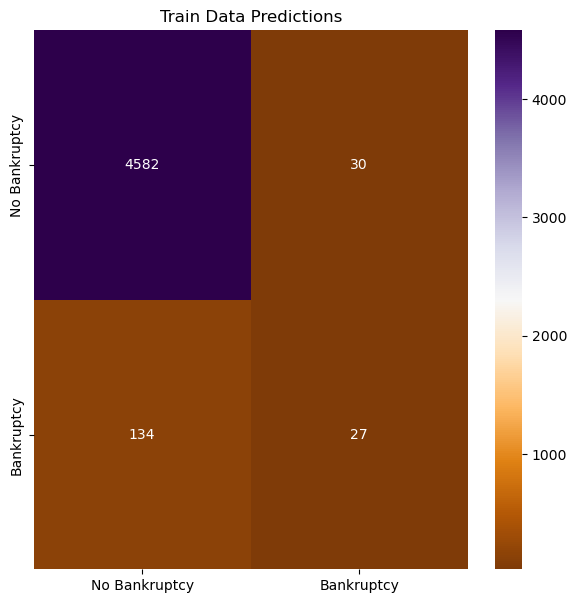



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4612
           1       0.47      0.17      0.25       161

    accuracy                           0.97      4773
   macro avg       0.72      0.58      0.62      4773
weighted avg       0.95      0.97      0.96      4773



In [59]:
y_train_pred = predict(ANN_model, X_train)
predict_graph(y_train, y_train_pred, 'Train Data Predictions')

In [60]:
acc9 = accuracy_score(y_test, y_pred)
print("Accuracy score: ", acc9)

Accuracy score:  0.9667644183773216


64/64 [==============================] - 0s 478us/step


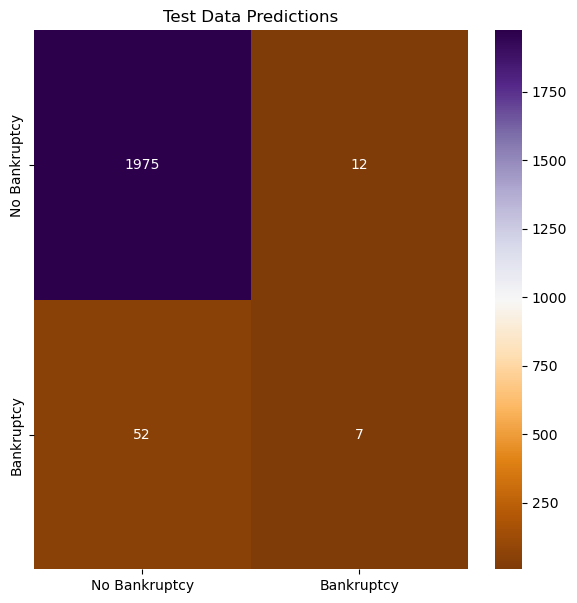



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1987
           1       0.37      0.12      0.18        59

    accuracy                           0.97      2046
   macro avg       0.67      0.56      0.58      2046
weighted avg       0.96      0.97      0.96      2046



In [61]:
# Test Predictions
y_test_pred = predict(ANN_model,X_test)
predict_graph(y_test, y_test_pred,'Test Data Predictions')

<a class="anchor" id="5"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">5. RESULT</p>

[**Table of Contents**](#0.1)

### Compare the accuracy of the models on the training set

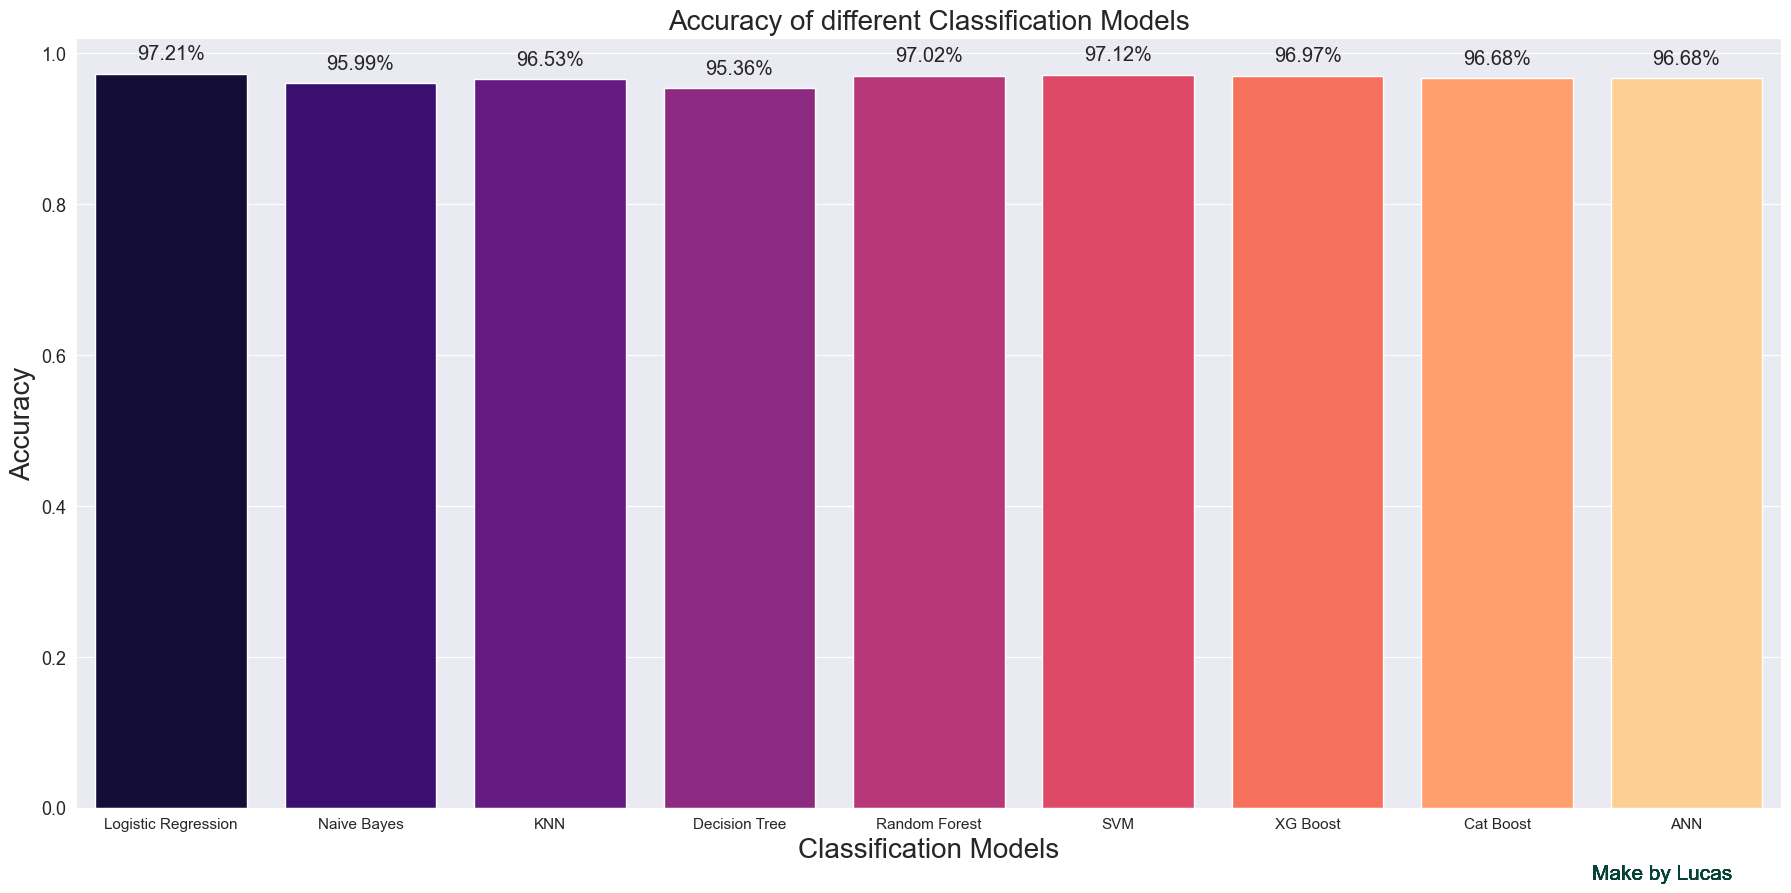

In [62]:
mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Decision Tree")
mylist.append(acc5)
mylist2.append("Random Forest")
mylist.append(acc6)
mylist2.append("SVM")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")
mylist.append(acc9)
mylist2.append("ANN")

plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "magma", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();

# palette = 'Greens_d'

**Nhận xét:**
+ Các mô hình đều có Accuracy rất cao, đều trên 95%.
+ Tuy nhiên, mô hình có Accuracy **cao nhất** là **Logistic Regression**.
+ Do đó, ta lựa chọn mô hình này để tiến hành dự báo.

### ROC Curve and Area Under the Curve

In [63]:
from sklearn.metrics import roc_curve, auc

**ROC - Logistic Regression**

In [64]:
y_pred_logistic = LR_model.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

**ROC - Naive Bayes**

In [65]:
y_pred_nb = NB_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

**ROC - KNN**

In [66]:
y_pred_knn = KNN_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

**ROC - Decision Tree**

In [67]:
y_pred_dtr = DTR_model.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

**ROC - Random Forest**

In [68]:
y_pred_rfc = RF_model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

**ROC - SVM**

In [69]:
y_pred_svm = SVM_model.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

**ROC - XG Boost**

In [70]:
y_pred_xgb = XGB_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

**ROC - CatBoost**

In [71]:
y_pred_catboost = catboost_model.predict_proba(X_test)[:,1]
catboost_fpr, catboost_tpr, threshold = roc_curve(y_test, y_pred_catboost)
auc_catboost = auc(catboost_fpr, catboost_tpr)

**ROC - ANN**

In [72]:
y_pred_ann = ANN_model.predict(X_test)
ann_fpr, ann_tpr, threshold = roc_curve(y_test, y_pred_ann)
auc_ann = auc(ann_fpr, ann_tpr)

64/64 [==============================] - 0s 460us/step


**ROC - Plotting Graph**

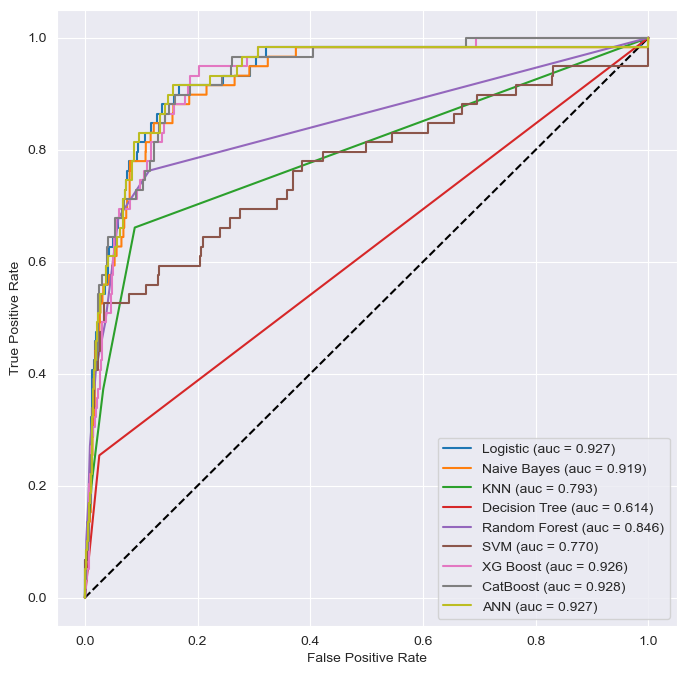

In [73]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.3f)' % auc_logistic)
# Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (auc = %0.3f)' % auc_nb)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.3f)' % auc_knn)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.3f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.3f)' % auc_rfc)
# SVM
plt.plot(svm_fpr, svm_tpr, label='SVM (auc = %0.3f)' % auc_svm)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.3f)' % auc_xgb)
# CatBoost
plt.plot(catboost_fpr, catboost_tpr, linestyle='-', label='CatBoost (auc = %0.3f)' % auc_catboost)
# ANN
plt.plot(ann_fpr, ann_tpr, label='ANN (auc = %0.3f)' % auc_ann)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

<a class="anchor" id="6"></a>
## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">6. CONCLUSIONS</p>

[**Table of Contents**](#0.1)

Dự báo về vỡ nợ của công ty được sử dụng trong các lĩnh vực khác nhau trên toàn nền kinh tế. Các tập đoàn có thể chẩn đoán tình trạng hiện tại của họ dựa trên các mô hình dự đoán và thiết lập các chiến lược của họ. Các nhà điều hành có thể điều hành doanh nghiệp của họ ổn định hơn bằng cách quản lý các chỉ số chính ảnh hưởng đến rủi ro vỡ nợ của công ty. Các nhà đầu tư có thể sửa đổi chiến lược của họ và cải thiện danh mục đầu tư của họ bằng cách kiểm tra khả năng vỡ nợ của công ty. Ngoài ra, các chính phủ có thể thiết lập các chính sách an toàn vĩ mô và cải thiện các quy định tài chính liên quan bằng cách sử dụng các dự đoán vỡ nợ của công ty. Theo những cách này, các mô hình dự đoán vỡ nợ giúp thiết kế và cải thiện hệ thống tài chính. Ngoài ra, bằng cách sử dụng các thuật toán học máy và mô hình thống kê, các dự đoán vỡ nợ của công ty là ưu tiên hàng đầu của kỹ thuật tài chính tiên tiến. Cuộc khủng hoảng tài chính toàn cầu gần đây và sự gia tăng rủi ro tín dụng càng làm nổi bật tầm quan trọng của lĩnh vực này. Do tầm quan trọng của chúng, các dự đoán vỡ nợ của công ty đã được nghiên cứu rộng rãi.

Trong bài phân tích này, một số kết quả quan trọng được tìm thấy như sau:
+ Đề tài sử dụng các mô hình Machine Learning để đưa ra mô hình tốt nhất cho dự báo phá sản tại các công ty.
+ Mô hình tốt nhất đưa ra là **Logistic Regression Model**. Mặc dù ANN có accuracy có độ chính xác rất cao (auc = 92.7%). Tuy nhiên, ANN model tốn thời gian thực hiện và chạy model hơn, do đó, Logistic Regression là lựa chọn tối ưu nhất được đề xuất.
+ Độ chính xác của mô hình xây dựng được là **92.7 %**.
+ Ngoài ra, **top 10 features** có tác động lớn đến Bankruptcy gồm:
    + Continuous interest rate (after tax),
    + Persistent EPS in the Last Four Seasons
    + Per Share Net profit before tax (Yuan ¥)
    + Debt ratio %
    + Net worth/Assets
    + Borrowing dependency
    + Net profit before tax/Paid-in capital
    + Net Income to Total Assets
    + Net Income to Stockholder's Equity
    + Equity to Liability
    
Tóm lại, việc xây dựng mô hình để dự đoán rủi ro vỡ nợ (hay rủi ro phá sản) là rất quan trọng đối với mỗi doanh nghiệp. Do đó, khi thực hiện dự báo vỡ nợ doanh nghiệp, cần lựa chọn một phương pháp phù hợp để có thể cung cấp thông tin phù hợp cho mục đích dự báo, đòi hỏi phải hiểu cặn kẽ về cách sử dụng phù hợp của từng phương pháp.

**Hướng mở trong tương lai, có thể kết hợp thêm các model Machine Learning khác như `Gradient Boosted Tree`, `AdaBoost`, `Light GBM` để đưa ra model với độ chính xác cao hơn.**

**<span style="color:#034235;"> Thanks for reading this post. </span>**

_______
_Make by_**<span style="color:#034235;"> Lucas,</span>**
### <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">END</p>
______
<img src="https://github.com/LeHongNgoc3820/Lucas_viet_Blog/blob/b5e2de5a812292889e793b719572d06f3ababf2d/Logo%20ta%CC%81ch%20ne%CC%82%CC%80n.png?raw=true"
     style="width:200px;height:200px;">

**<span style="color:#034235;"> You can contact with me on:</span>**
+ **Gmail**: lehongngoc.work@gmail.com
+ **GitHub**: [LeHongNgoc3820](https://github.com/LeHongNgoc3820)
+ **Linkedln**: [Ngoc Le Hong](https://www.linkedin.com/in/ngoc-le-hong-44131b21a/)